In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# wczytanie danych
posts = pd.read_xml("bitcoin/Posts.xml", parser = 'etree', )
comments = pd.read_xml("bitcoin/Comments.xml", parser = 'etree', )
votes = pd.read_xml("bitcoin/Votes.xml", parser = 'etree', )
users = pd.read_xml("bitcoin/Users.xml", parser = 'etree', )
# usunięcie wpisów NaN

In [3]:
# Przygotowaine ramek
posts = posts[['Id',"Body", 'Tags', 'CreationDate', 'OwnerUserId']]
posts["CreationDate"] = pd.to_datetime(posts['CreationDate'],format='%Y-%m-%d')
posts["CreationMonth"] = posts["CreationDate"].dt.strftime('%Y-%m')
posts["CreationDate"] = posts["CreationDate"].dt.date

comments["CreationDate"] = pd.to_datetime(comments['CreationDate'],format='%Y-%m-%d')
comments["CreationMonth"] = comments["CreationDate"].dt.strftime('%Y-%m')
comments["CreationDate"] = comments["CreationDate"].dt.date

votes["CreationDate"] = pd.to_datetime(votes['CreationDate'],format='%Y-%m-%d')
votes["CreationMonth"] = votes["CreationDate"].dt.strftime('%Y-%m')
votes["CreationDate"] = votes["CreationDate"].dt.date



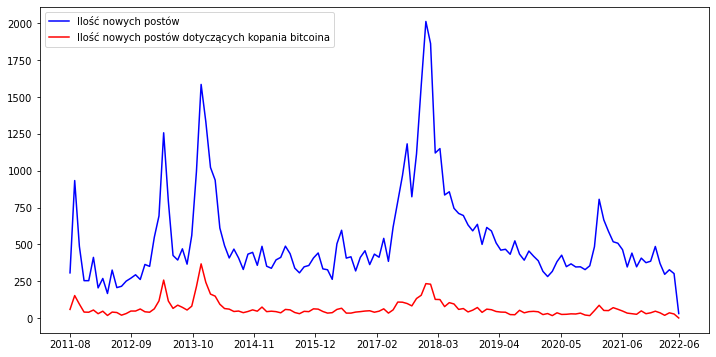

In [8]:
# sprawdzenie czy post jest o kopaniu kryptowalut
posts["IsAboutMining"] = posts.Body.str.contains('mining') | posts.Tags.str.contains('mining') 

plotData = posts.groupby(["CreationMonth"]).size().reset_index(name='Count')
plotDataMining = posts[posts["IsAboutMining"] == True]
plotDataMining = plotDataMining.groupby(["CreationMonth"]).size().reset_index(name='Count')


x_posts = plotData["CreationMonth"]
y_posts = plotData["Count"]

x_posts_mining = plotDataMining["CreationMonth"]
y_posts_mining = plotDataMining["Count"]

n = len(x_posts)
labelLocations=[]
for i in range(10):
    labelLocations.append(n*i/10)
labelLocations.append(n-1)

fig = plt.subplots(figsize=(12, 6))

plt.plot(x_posts,y_posts, color='blue')
plt.plot(x_posts_mining,y_posts_mining, color='red')

plt.xticks(labelLocations)
plt.legend(['Ilość nowych postów', 'Ilość nowych postów dotyczących kopania bitcoina'])

plt.show()

([<matplotlib.axis.XTick at 0x2336a9cb460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

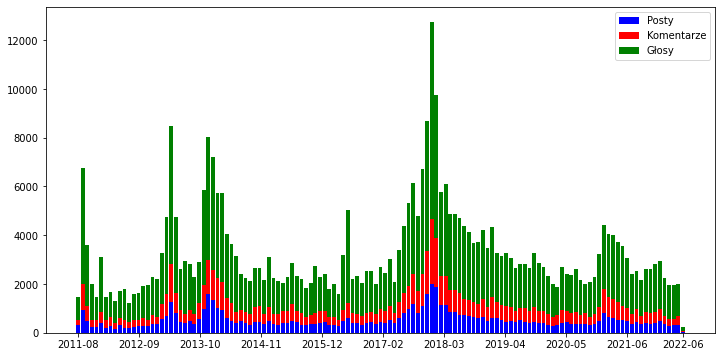

In [5]:
# ogólna aktywność na forum

fig2 = plt.subplots(figsize=(12, 6))

# komentarze
plotDataComments = comments[["Id","CreationMonth"]]
plotDataComments = plotDataComments.groupby(["CreationMonth"]).size().reset_index(name='Count')
x_comments = plotDataComments["CreationMonth"]
y_comments = plotDataComments["Count"]

# głosy
plotDataVotes = votes[["Id","CreationMonth"] ]
plotDataVotes = plotDataVotes.groupby(["CreationMonth"]).size().reset_index(name='Count')
x_votes = plotDataVotes["CreationMonth"]
y_votes = plotDataVotes["Count"]

plt.bar(x_posts,y_posts, color='blue')
plt.bar(x_comments,y_comments, color='red', bottom=y_posts)
plt.bar(x_votes,y_votes, color='green', bottom=y_comments+y_posts) 

plt.legend(['Posty', 'Komentarze', 'Głosy'])

plt.xticks(labelLocations)


C:\Users\patry\AppData\Local\Temp\ipykernel_25988\1166406888.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity.append(comments[["CreationMonth", "UserId"]])
C:\Users\patry\AppData\Local\Temp\ipykernel_25988\1166406888.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  activity.append(votes[["CreationMonth", "UserId"]].dropna())


([<matplotlib.axis.XTick at 0x2336d381d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

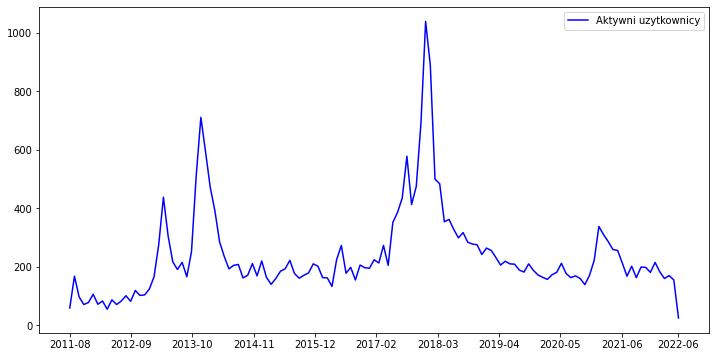

In [6]:
# ilość aktywnych użytkowników w poszczególnych miesiącach
# ilość nowych użytkowników w poszczególnych miesiącach

activity = posts[["CreationMonth", "OwnerUserId"]]
activity.columns = ["CreationMonth", "UserId"]
activity.append(comments[["CreationMonth", "UserId"]]) 
activity.append(votes[["CreationMonth", "UserId"]].dropna()) 

activity = activity.groupby(['CreationMonth', 'UserId']).size()
activity = activity.groupby(['CreationMonth']).size().reset_index(name='Count')

x_activity = activity["CreationMonth"]
y_activity = activity["Count"]

fig3 = plt.subplots(figsize=(12, 6))
plt.plot(x_activity,y_activity, color='blue')
plt.legend(['Aktywni uzytkownicy'])

plt.xticks(labelLocations)
